# Hospital Readmissions Data Analysis and Recommendations for Reduction

Sarah Robinson
9.11.18

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [53]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('../hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

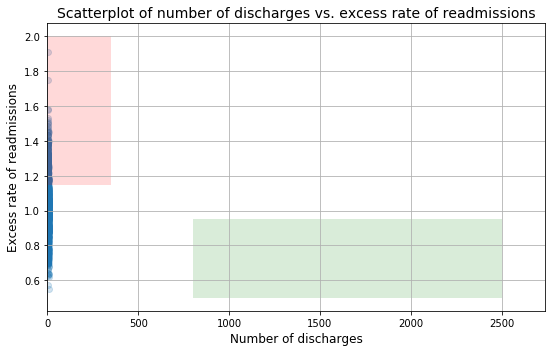

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

### A.  Do you agree with the above analysis and recommendations? Why or why not?

I am skeptical of the inital observations and conclusions. The plot is misleading; there is a slight trend downward but its tough to say what is really going on with the dense clump of observations near the left. Based on the graph alone, it is unclear if there is actually a greater incidence of readmissions in the shaded red area. The statistics only examine the observations at the far ends, and not the bulk of the data in the middle. Additionally, without a proper hypothesis test, any statement of significance is unfounded. 

### B.  Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### 1. Setup an appropriate hypothesis test.

I will test 3 hypothesis
H0-1 : Hospitals with Excess Rate of Readmissions (ERR) > 1, have the same average value as hospitals with ERR <=1.
H0-2 : Small Hospitals (discharge < 300) have the same ERR as large hospitals (discharge >= 300)
H0-3 : There is no correlation between number of discharges and ERR

In [20]:
#pull out relevant columns
my_df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]

In [23]:
my_df = my_df.dropna()
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Number of Discharges        11497 non-null int32
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


In [36]:
excess_df = my_df[my_df['Excess Readmission Ratio']>1]
noexcess_df = my_df[my_df['Excess Readmission Ratio']<=1]
small_df = my_df[my_df['Number of Discharges']<300]
large_df = my_df[my_df['Number of Discharges']>=300]

In [37]:
excess_dis = excess_df['Number of Discharges'].values
noexcess_dis = noexcess_df['Number of Discharges'].values
small_err = small_df['Excess Readmission Ratio'].values
large_err = large_df['Excess Readmission Ratio'].values

In [41]:
err = my_df['Excess Readmission Ratio'].values
discharge = my_df['Number of Discharges'].values

 #### 2. Compute and report the observed significance value (or p-value).
 

In [45]:
#Test H0-1: Hospitals with Excess Rate of Readmissions (ERR) > 1, have the same average value as hospitals with ERR <=1.
t_value1, p_value1 = stats.ttest_ind(excess_dis, noexcess_dis)
print(p_value1)

1.0332472818989955e-07


In [106]:
#Test H0-2: Small Hospitals (discharge < 300) have the same ERR as large hospitals (discharge >= 300)
t_value2, p_value2 = stats.ttest_ind(small_err, large_err)
print('Mean ERR for Small Hospitals = '+ str(np.mean(small_err)))
print('Mean Err for Large Hospitals = '+ str(np.mean(large_err)))
print(p_value2)

Mean ERR for Small Hospitals = 1.0142382121807467
Mean Err for Large Hospitals = 0.9998708480237521
5.689538089333538e-17


In [44]:
#Test H0-3: There is no correlation between number of discharges and ERR
pearson_r, p_value3 = stats.pearsonr(discharge, err)
print(pearson_r)
print(p_value3)

-0.09739794351079353
1.222547377680967e-25


#### 3. Report statistical significance for $\alpha$ = .01. 

In [47]:
# Significance of H0-1: Hospitals with ERR > 1 have the same number of discharges as hospitals with ERR <=1.
alpha = .01
if p_value1 > alpha:
    print("There is no significant difference in number of discharges")
else:
    print("There is a significant difference in number of discharges between hospitals with excess and those without.")

print("p-value = "+ str(p_value1))

There is a significant difference in number of discharges between hospitals with excess and those without.
p-value = 1.0332472818989955e-07


In [48]:
# Significance of H0-2: Small Hospitals (discharge < 300) have the same ERR as large hospitals (discharge >= 300)
alpha = .01
if p_value2 > alpha:
    print("There is no significant difference in Excess Readmission Rates.")
else:
    print("There is a significant difference in Excess Readmission Rates between small and large hospitals.")

print("p-value = "+ str(p_value2))

There is a significant difference in Excess Readmission Rates between small and large hospitals.
p-value = 5.689538089333538e-17


In [51]:
# Significance of H0-3: There is no correlation between number of discharges and ERR
alpha = .01
if p_value2 > alpha:
    print("There is no significant correlation between number of discharges and ERR.")
elif pearson_r > 0:
    print("There is a significant positive correlation between number of discharges and ERR.")
else:
    print("There is a significant negative correlation between number of discharges and ERR.")

print("p-value = "+ str(p_value3))
print("pearson r = "+ str(pearson_r))

There is a significant negative correlation between number of discharges and ERR.
p-value = 1.222547377680967e-25
pearson r = -0.09739794351079353


####   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistcally, there is a significent difference between small and large hospitals' ERR. Small hospitals (less than 300), have a mean ERR of 1.0142 and large hospitals have a mean ERR of 0.99987. Statistical significance indicates that this 1.4% difference is highly probable and repeatable, but it does not calculate the significence for practicality. Without knowing the full financial picture, it is hard to say for sure if 1.4% would be worth the investment in policy change. An assesment should be done to determine the cost/benifits of regulating that 1.4%. 


#### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

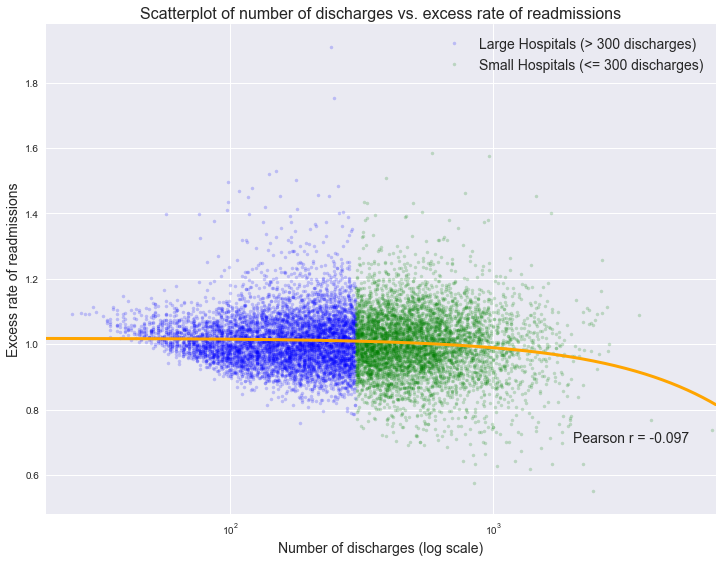

In [105]:
#get x and y values
x_small = small_df['Number of Discharges']
y_small = small_df['Excess Readmission Ratio']

x_large = large_df['Number of Discharges']
y_large = large_df['Excess Readmission Ratio']

m, b = np.polyfit(discharge, err, 1)
x = np.arange(7000)
y = m*x + b

sns.set()
_ = plt.subplots(figsize = (12,9))
_ = plt.plot(x_small, y_small, marker = '.', color = 'blue', linestyle = 'none', alpha = .2)
_ = plt.plot(x_large, y_large, marker = '.', color = 'green', linestyle = 'none', alpha = .2)
_ = plt.plot(x, y, linewidth = 3, color = 'orange')
_ = plt.xlim([20, 7000])
_ = plt.xscale('log')

_ = plt.xlabel('Number of discharges (log scale)', fontsize=14)
_ = plt.ylabel('Excess rate of readmissions', fontsize=14)
_ = plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=16)
_ = plt.legend(['Large Hospitals (> 300 discharges)', 'Small Hospitals (<= 300 discharges)'], fontsize=14)
_  = plt.annotate('Pearson r = -0.097', (2000,.7), fontsize = 14)




The advantage of a scatter plot is that it illustrates all of the data, giving the view a full picture rather than a summary. The first scatter plot is difficult to read. The dense clump of observations near the y-axis provide little insight, and the color boxes do not articulate the size differences. 

In this second scatter plot, the log scale on the x-axis spreads out the observations to make the trend more clear. The hospitals sizes are clearly indicated by color, so that the view knows exactly which hospitals will be effected by the policy. Lastly, the regression line with the annotated pearson coefficent makes the correlation clear, so that it can be easily referenced when noting the significance of the relationship. 